In [22]:
from openparticle import *
import matplotlib.pyplot as plt

# Static Yukawa Hamiltonian:

$H = E_f b^\dagger b + E_b a^\dagger a + gE_I b^\dagger (a^\dagger + a)b$

RGPEP Equation:

$\frac{d}{dt}H(t) = [\mathcal{G}_t, H(t)]$

$\mathcal{G}_t = [H(0), H(t)]$

$H(t) = E_f(t)b^\dagger b + E_b(t) a^\dagger a + g(t)E_I b^
\dagger (a^\dagger + a)b \rightarrow \frac{d}{dt}H(t)= [\mathcal{G}_t, H(t)]$

$\dot{E}_f b^\dagger b + \dot{E}_b(t) a^\dagger a + \dot{g(t)}E_I b^
\dagger (a^\dagger + a)b = [\mathcal{G}_t, E_f(t)b^\dagger b+ E_b(t) a^\dagger a + g(t)E_I b^
\dagger (a^\dagger + a)b]$

In [4]:
Ef, Eb, Ei = 1, 1, 1
g = 0.1

In [7]:
H0 = Ef * ParticleOperator('b0^ b0') + Eb * ParticleOperator('a0^ a0')
Hi = g * Ei * (ParticleOperator('b0^') * (
    ParticleOperator('a0^') + ParticleOperator('a0')
    )*ParticleOperator('b0') )
Hcan = H0 + Hi

In [10]:
Gt = H0.commutator(Hcan)
Gt

0.1 * b0^ b0 a0^
-0.1 * b0^ b0 a0

In [11]:
rhs = Gt.commutator(Hcan)

In [12]:
rhs

-0.1 * b0^ b0 a0^
-0.1 * b0^ b0 a0
-0.020000000000000004 * b0^ b0
0.020000000000000004 * b0^ b0^ b0 b0

From the RGPEP equation, we see:

$\dot{E}_f(t) b^\dagger b + \dot{g}(t)E_I b^\dagger(a^\dagger + a)b = -g(t)E_b^2E_Ib^\dagger(a^\dagger + a)b - 2g^2(t)E_bE_I^2b^\dagger b$

Thus,

\begin{cases}
\dot{E}_f(t) = -2g^2(t)E_bE_I^2 \\
\dot{g}(t) = -g(t)E_b^2

\end{cases}

The second equation implies $g(t) = ge^{-E_b^2t}$. Plugging this into the first equation gives $\dot{E}_f(t) = -2g^2e^{-2E_b^2t}E_bE_I^2$. Solving this separable ODE gives: 

$E_f(t) - E_f = -2g^2E_bE_I^2\int_0^t dt e^{-2E_b^2t}$

$\implies E_f(t) = E_f + g^2(1 - e^{-2E_b^2})E_I^2/E_b$

Thus, 

$$H(t) = [E_f + g^2(1 - e^{-2E_b^2t})E_I^2/E_b]b^\dagger b + E_b a^\dagger a + ge^{-2E_bt}E_I b^\dagger (a^\dagger + a)b$$

In [34]:
def H(t):
    return (Ef + g**2*(1 - np.exp(-2*Eb**2 * t))*Ei**2/Eb) * ParticleOperator('b0^ b0')+\
    Eb * ParticleOperator('a0^ a0') +\
    g * np.exp(-2*Eb**2 * t) * Ei * (ParticleOperator('b0^') * (
    ParticleOperator('a0^') + ParticleOperator('a0')
    )*ParticleOperator('b0') )

In [46]:
vacuum = Fock([], [], [])
f = Fock([0], [], [])
b = Fock([], [], [(0, 1)])
interact = Fock([0], [], [(0, 1)])

In [48]:
basis = [vacuum, f, b, interact]

In [49]:
H(0), H(10)

(1.0 * b0^ b0
 1.0 * a0^ a0
 0.1 * b0^ a0^ b0
 0.1 * b0^ a0 b0,
 1.0099999999793885 * b0^ b0
 1.0 * a0^ a0
 2.061153622438558e-10 * b0^ a0^ b0
 2.061153622438558e-10 * b0^ a0 b0)

In [68]:
Hmat_t0 = generate_matrix_from_basis(H(0), basis)

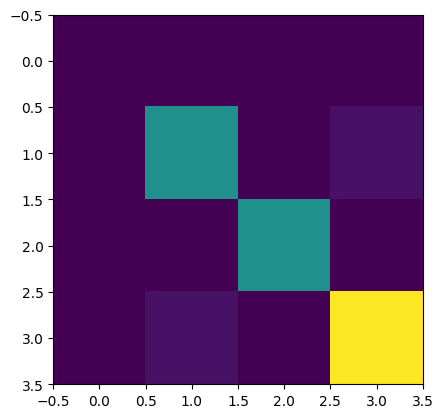

In [69]:
plt.imshow(Hmat_t0)

In [70]:
vals_t0, vecs_t0 = np.linalg.eigh(Hmat_t0)

In [71]:
vals_t0[vals_t0 > 0].min()

0.9900980486407215

E_0: 1.0


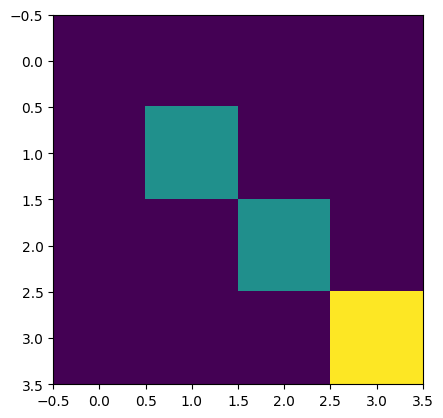

In [75]:
Hmat_t10 = generate_matrix_from_basis(H(10), basis)
plt.imshow(Hmat_t10)
vals_t10, vecs_t10 = np.linalg.eigh(Hmat_t10)
print("E_0:", (vals_t10[vals_t10 > 0].min()))